In [1]:
adham.py

NameError: name 'adham' is not defined

In [2]:
python adham.py

SyntaxError: invalid syntax (<ipython-input-2-6d583ba6aa65>, line 1)

In [ ]:
# %load adham.py

import matplotlib.pyplot as plt
import numpy as np
import random
import sys
sys.path
from point import *
from extent import *
from kdtree1 import *
from kdtree2b import *
from kfunction import *
from osgeo import ogr
#from shapex import *
# Get shapfiles for processing.
driver = ogr.GetDriverByName("ESRI Shapefile")

#fname = 'airport/airprtx010g.shp' # USA Airport locations(point).
airPorts = driver.Open(fname, 0)
#airPorts = shapex(fname)# 0 for read only, 1 for writable
# Imported shapfile has been projected to USA_Contiguous_Equidistant_Conic.


#airPortLayer = airPorts.GetLayer(0) # Get layer with airport features. 
airPortLayer = airPorts[0]
# make airport features into point class.
airportPointClass = []
for i in range(airPortLayer.GetFeatureCount()):
     f = airPortLayer.GetFeature(i)
     geom = f.GetGeometryRef()
     airportPointClass.append(Point(geom.GetPoint(0)[0], geom.GetPoint(0)[1])) # Point class


#for a in airPortLayer['properties'].keys():
#    f=airPortLayer[a]['properties']['coordinates']
    




# Draw airports
def draw_points(points, area):
    fig, ax = plt.subplots()
    xs = [p.x for p in points]
    ys = [p.y for p in points]
    ax.scatter(xs, ys, edgecolor='none', facecolor='green', alpha=0.5)
    plt.xlabel('meters')
    plt.title('Airports in South-East Region of US')
    plt.grid()
    plt.xlim(extent[0], extent[1])
    plt.ylim(extent[2], extent[3])
    ax.set_aspect(1)
    plt.show()
    

# Set area
extent = airPortLayer.GetExtent()
area = Extent(extent[0], extent[1], extent[2], extent[3]) # get area of airports from geomotry.

# Plot airports
draw_points(airportPointClass, area)
# Number of airports
n = len(airportPointClass)

# k-fucntion
def get_kfunction_values(points, area):
    n = len(points)
    density = float(n)/area.area()
    t = kdtree2(points)
    d = min([area.xmax-area.xmin, area.ymax-area.ymin])*2.0/3/10.0 # a 10th of 2/3 of the length
    ds = [ d*(i+1) for i in range(10)]
    lds = [0 for d in ds]
    for i, d in enumerate(ds):
        for p in points:
            ld = kfunc(t, p, d, density)[1]
            lds[i] += ld
    return ds, [ld/n for ld in lds]


#Monte Carlo test
def kfunc_monte_carlo(n, area, radii, density, rounds=100):
    """
    Input
      n:            number of points, not used
      area:         Extent object defining the area
      radii:        list containing a set of radii of circles
      density:      density of point events in the area
      rounds:       number of simulations
    Return
      percentiles:  a list of 2.5th and 97.5th percentiles
                    for each d in radii
    """
    alllds = []
    for test in range(rounds):
        N = np.random.poisson(n)
        x = list(np.random.uniform(area.xmin, area.xmax, N))
        y = list(np.random.uniform(area.ymin, area.ymax, N))
        points = [Point(x[i], y[i]) for i in range(N)]
        t = kdtree2(points)
        lds = [0 for d in radii]
        for i, d in enumerate(radii):
            for p in points:
                ld = kfunc(t, p, d, density)[1]
                lds[i] += ld
        lds = [ld/N for ld in lds]
        alllds.append(lds)
    alllds = np.array(alllds)
    percentiles = []
    for i in range(len(radii)):
        percentiles.append([np.percentile(alllds[:,i], 2.5),
                            np.percentile(alllds[:,i], 97.5)])
    return percentiles

# Call functions
ds, lds1 = get_kfunction_values(airportPointClass,area)
density = float(n)/area.area()
percentiles = kfunc_monte_carlo(n, area, ds, density)


#plot k-function
fig, ax = plt.subplots()
plt.plot(ds, [p[1] for p in percentiles], color='grey', label='97.5% Envelope')
plt.plot(ds, lds1, color='blue', label='Airports')
plt.plot(ds, [p[0] for p in percentiles], color='grey', label='2.5% Envelope')
plt.plot([0, plt.xlim()[1]], [0, plt.xlim()[1]], color='red', label='L(d)=d')

plt.xlabel('Radius ($d$)')
plt.ylabel('$L(d)$')
plt.title('K Function ($\lambda$ = {0:5.2f})'.format(density))
plt.legend(loc='right', bbox_to_anchor=(1.55, 0.5))

plt.xlabel('Radius ($d$)')
plt.ylabel('$L(d)$')
ax.set_aspect(1)
plt.show()






In [4]:
%run adham.py

NameError: name 'fname' is not defined

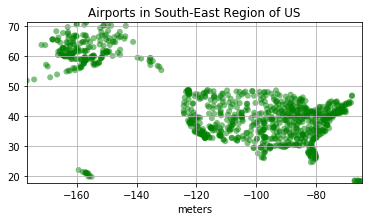

KeyboardInterrupt: 

In [5]:
%run adham.py

In [6]:
%run adham.py

IndentationError: unexpected indent (adham.py, line 86)

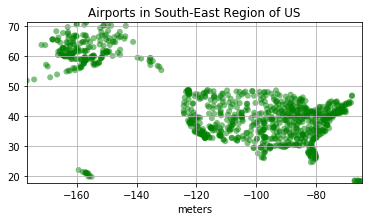

KeyboardInterrupt: 

In [7]:
%run adham.py

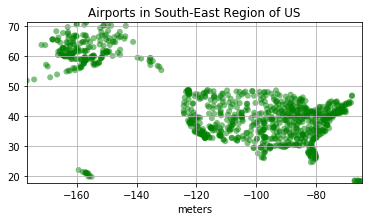

Random
(0.6417175000305739, 0.759726794191133, 0.8057093734331765, 0.8598222596787948)
(1.2834350000611479, 1.2461097453482626, 1.3056653684250126, 1.3747241675043038)
(1.9251525000917218, 1.7297578403553877, 1.814625814932769, 1.901265094714239)
(2.5668700001222957, 2.1918414349663786, 2.3424152242684113, 2.4168205183485316)
(3.20858750015287, 2.6148712104561023, 2.8343670756503103, 2.9064481812940484)
(3.8503050001834436, 2.9959982346337695, 3.2650888481949765, 3.3700244681982987)
(4.492022500214017, 3.3509352038838616, 3.6441125876813785, 3.7826128857168255)
(5.133740000244591, 3.669676260740668, 4.0091640191301465, 4.142600764541644)
(5.775457500275166, 3.991948905258365, 4.323964693477747, 4.469845370894172)
(6.41717500030574, 4.312841762135892, 4.623292946593553, 4.75114765322509)
Three blocks
(1.9408693049393702, 2.290243218490312, 3.6191232124127333, 2.559045267121638)
(3.8817386098787403, 3.710879882906885, 6.069739693191398, 4.121693065941643)
(5.822607914818111, 5.2885588685

In [8]:
%run adham.py

In [9]:
%run kfunction.py

KeyboardInterrupt: 

In [ ]:
%run kfunction.py

In [1]:
%run adham.py

<Figure size 640x480 with 1 Axes>

KeyboardInterrupt: 

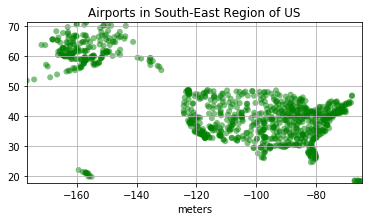

Random
(0.6608962911016076, 0.7695443058233828, 0.80060761656571, 0.8798419084002532)
(1.3217925822032153, 1.261577378954256, 1.3084934682200826, 1.4005747188766386)
(1.982688873304823, 1.7768985227830907, 1.8327615048274128, 1.959331642912705)
(2.6435851644064305, 2.253129300842026, 2.325599352748107, 2.4958548503599687)
(3.3044814555080384, 2.7131108509897786, 2.802353569890601, 3.017633123492883)
(3.965377746609646, 3.126492120842215, 3.2025724435286573, 3.459595306117574)
(4.626274037711253, 3.4959000372086533, 3.610008483885598, 3.8790527035745868)
(5.287170328812861, 3.8395212972954114, 3.964909057413058, 4.254168069472879)
(5.948066619914469, 4.180737909746078, 4.298093950871378, 4.593319644630602)
(6.608962911016077, 4.476583877015123, 4.624472819458172, 4.859203954055177)
Three blocks
(1.9471453625435646, 2.31325219082082, 3.2646772185353887, 2.588601046812732)
(3.8942907250871293, 3.7179835486751736, 5.5585037877982915, 4.1648597356321915)
(5.841436087630694, 5.23463455698959

In [2]:
%run adham.py

In [3]:
%run kfunction.py

NameError: name 'points' is not defined

In [4]:
%run adham.py

SyntaxError: invalid syntax (adham.py, line 123)

In [5]:
%run adham.py

SyntaxError: invalid syntax (adham.py, line 123)

KeyboardInterrupt: 

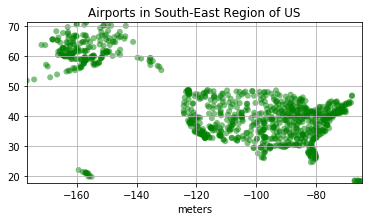

In [6]:
%run adham.py

NameError: global name 'pi' is not defined

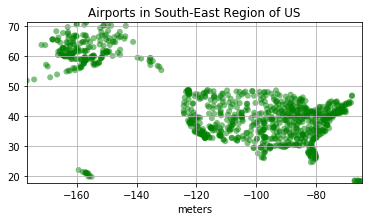

In [7]:
%run adham.py

KeyboardInterrupt: 

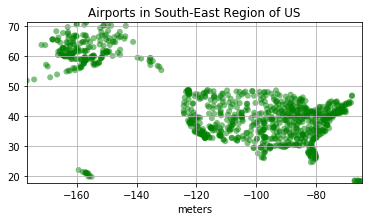

In [8]:
%run adham.py

KeyboardInterrupt: 

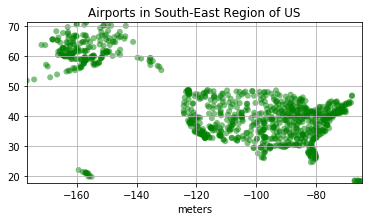

In [9]:
%run adham.py

In [10]:
%run adham.py

KeyboardInterrupt: 

In [ ]:
%run adham.py